# Section 1 - Stepwise creation of SQL queries

Use a stepwise approach to develop an SQL query in Python.

- Use the following data: TL 2019 US Count
    - Query 1: Select all counties in Alaska (STATEFP for Alaska is '02')
    - Query 2: Select all counties in Oregon, Montana, and Washington (STATEFPs: OR is '41', MT is '30', WA is '53')
- Use the following data:  builtupp_usa.shp_nt00899.tar.gz
    - Query 3: Select all cities with a population that is equal to or greater than 500,000
    - Query 4: Select all cities with the name Albany
    - Query 5: Select all cities with a population between 10,000 and 100,000


For each of the queries, follow these steps:

- ArcGIS Pro:
    1. Open the respective dataset in ArcGIS Pro
    2. Open the attribute table and use the Select By Attributes functionality. Create a New Expression in SQL
    3. Use the Select By Attributes dialog to construct the specified query
    4. Apply the query to make sure that it is correct and produces the specified selection

- Jupyter Notebook
    1. Copy the query from the Select by Attributes dialog to your notebook
    2. Convert the copied query into a string literal (pay special attention to the use of quotes)
    3. Assign the string literal to a string variable (use a variable name of your choice)
    4. Copy and paste the string variable and literal to practice the use of format()
    5. Create a variable for each column name (field name) or value that is part of your query string literal
    6. Use the format() method in combination with your variables to create the query string literal and save it in a variable named query_X (update the X with the number for the different queries)
    7. print query_X to see the results 

In [22]:
query_one = '"STATEFP" = \'02\''
field_name = "STATEFP"
value = "02"
query_1 = '"{0}" = \'{1}\''.format(field_name, value)
print(query_1)

"STATEFP" = '02'


In [24]:
query_two = '"STATEFP" = \'41\' Or "STATEFP" = \'30\' Or "STATEFP" = \'53\''
states = ["41", "30", "53"]
field_name = "STATEFP"
query_2 = ""

for i in range(len(state)):
    query_2 = query_2 + '"{0}" = \'{1}\''.format(field_name, states[i])
    if(i < len(state)-1):
        query_2 = query_2 + ' Or '

print(query_2)

"STATEFP" = '41' Or "STATEFP" = '30' Or "STATEFP" = '53'


In [26]:
query_three = '"pop" >= 500000'
field_name = "pop"
value = 500000
query_3 = '"{0}" >= {1}'.format(field_name, value)

print(query_3)

"pop" >= 500000


In [28]:
query_four = '"nam" = \'Albany\''
field_name = "nam"
value = 'Albany'
query_4 = '"{0}" = \'{1}\''.format(field_name, value)

print(query_4)

"nam" = 'Albany'


In [29]:
query_five = '"pop">= 10000 And "pop" <= 100000'
populations = [10000, 100000]
field_name = "pop"

query_5 = '"{0}" >= {1} And "{0}" <= {2}'.format(field_name, min(populations), max(populations))

print(query_5)

"pop" >= 10000 And "pop" <= 100000


# Section 2 - Select counties in three states

- Ask the user of your script for three different states to select in your query (use the STATEFP to identify the states)
- Use the format() method to create your string literal, using the field name and the three state identifiers as arguments for calling the format() method
- Print the resulting string literal and double-check the use and nesting of quotes

In [1]:
import arcpy
from arcpy import env
# Create a dictionary mapping the states to their number.
state_num = {
    "Alabama": "01",
    "Alaska": "02",
    "Arizona": "03",
    "Arkansas": "04",
    "California": "05",
    "Colorado": "06",
    "Connecticut": "07",
    "Delaware": "08",
    "Florida": "09",
    "Georgia": "10",
    "Hawaii": "11",
    "Idaho": "12",
    "Illinois": "13",
    "Indiana": "14",
    "Iowa": "15",
    "Kansas": "16",
    "Kentucky": "17",
    "Louisiana": "18",
    "Maine": "19",
    "Maryland": "20",
    "Massachusetts": "21",
    "Michigan": "22",
    "Minnesota": "23",
    "Mississippi": "24",
    "Missouri": "25",
    "Montana": "26",
    "Nebraska": "27",
    "Nevada": "28",
    "New Hampshire": "29",
    "New Jersey": "30",
    "New Mexico": "31",
    "New York": "32",
    "North Carolina": "33",
    "North Dakota": "34",
    "Ohio": "35",
    "Oklahoma": "36",
    "Oregon": "37",
    "Pennsylvania": "38",
    "Rhode Island": "39",
    "South Carolina": "40",
    "South Dakota": "41",
    "Tennessee": "42",
    "Texas": "43",
    "Utah": "44",
    "Vermont": "45",
    "Virginia": "46",
    "Washington": "47",
    "West Virginia": "48",
    "Wisconsin": "49",
    "Wyoming": "50"
}
print(state_num["Texas"])

43


In [8]:
states = []
field_name = "STATEFP"
query_county = ""
env.workspace = "C:\\Users\\Megan\\OneDrive\\Desktop\\School Documents\\Grad School\\GIS5653\\Week 5"
in_features = env.workspace + "\\tl_2019_us_county\\tl_2019_us_county.shp"
out_feature_class = env.workspace + "\\tl_2019_us_county\\output.shp"
where_clause = '"CLASS" = \'4\''

# get 3 states from the customer and validate it's a state.
while (len(states) < 3):
    try:
        test_state = input("Enter a state Name: ")
        arcpy.Select_analysis(in_features, out_feature_class, '"STATEFP" = \'{0}\''.format(state_num[test_state]))
        states.append(test_state)
    except:
        print("That is not a state in the USA")

# Desired Example format: '"STATEFP" = \'41\' Or "STATEFP" = \'30\' Or "STATEFP" = \'53\''
for i in range(len(states)):
    query_county = query_county + '"{0}" = \'{1}\''.format(field_name, state_num[states[i]])
    if(i < len(states)-1):
        query_county = query_county + ' Or '

print(query_county)

Enter a state Name: hi
That is not a state in the USA
Enter a state Name: Ohio
Enter a state Name: Texas
Enter a state Name: Alaska
"STATEFP" = '35' Or "STATEFP" = '43' Or "STATEFP" = '02'


# Extra Credit


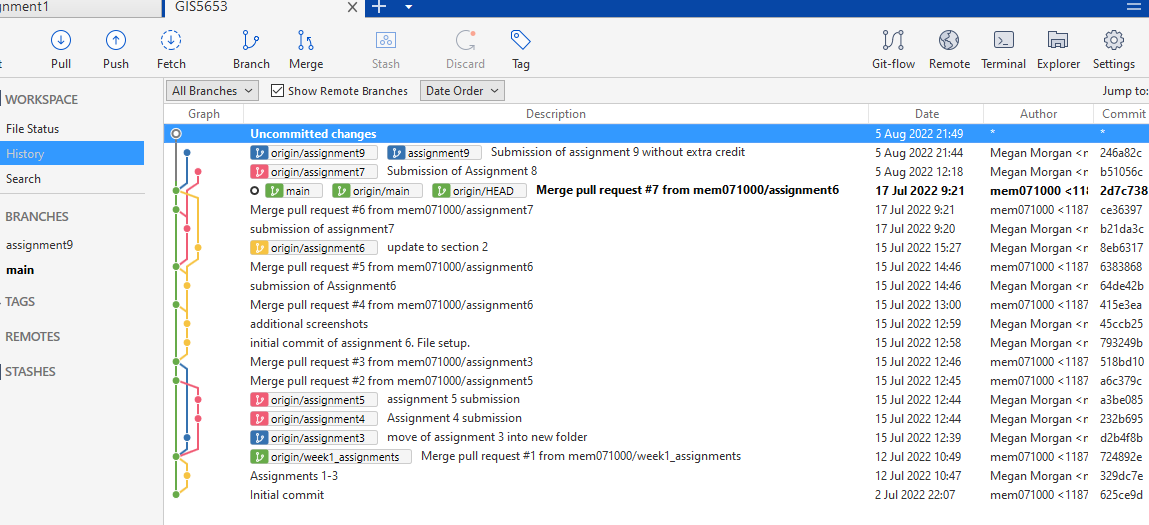

In [1]:
from IPython.display import Image
Image("C:\\Users\\Megan\\OneDrive\\Desktop\\School Documents\\Grad School\\GIS5653\\Week 5\\extra-credit.PNG")